In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dfx=pd.read_csv('C:/Users/ACER/OneDrive/Python/data linear regression/ass/Linear_X_Train.csv')
dfy=pd.read_csv('C:/Users/ACER/OneDrive/Python/data linear regression/ass/Linear_Y_Train.csv')

In [5]:
x=dfx.values
y=dfy.values
x=x.reshape((-1,))
y=y.reshape((-1,))
print(x.shape,y.shape)

(3750,) (3750,)


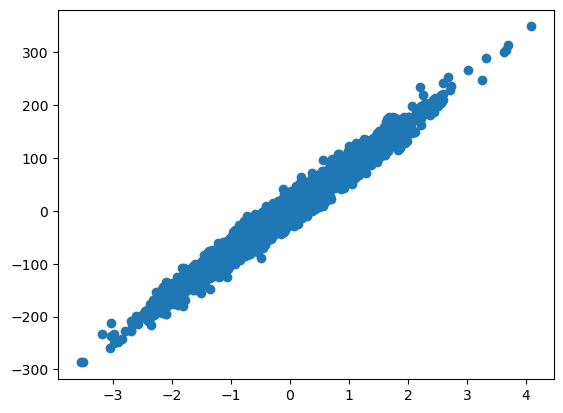

In [6]:
plt.scatter(x,y)
plt.show()

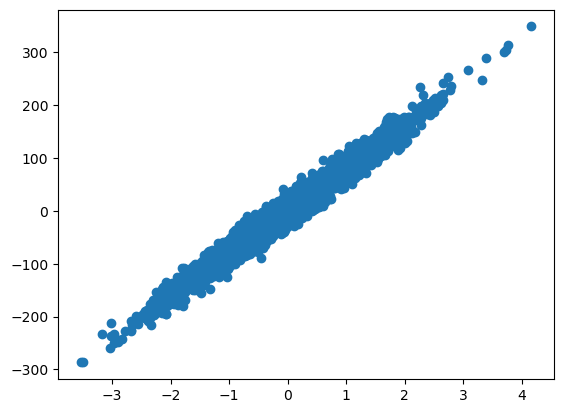

In [7]:
x_train=(x-x.mean())/x.std()
y_train=y
plt.scatter(x_train,y_train)

In [30]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [31]:
def error(x,theta,y):
    err = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        err += (hx-y[i])**2
        
    return err

In [32]:
def gradient(x,theta,y):
    m = x.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i])*x[i]
        
    return grad/m

In [33]:
def gradient_descent(x,y,learning_rate = 0.01):
    
    
    theta = np.zeros((2,))
    
    err_list = []
    theta_list = []
    
    for i in range(1000):
        grad = gradient(x,theta,y)
        err = error(x,theta,y)
        
        err_list.append(err)
        theta_list.append((theta[0],theta[1]))
        
        theta[0] -= (learning_rate*(grad[0]))
        theta[1] -= (learning_rate*grad[1])
    
    return theta,err_list,theta_list

In [34]:
final_theta , err_list , theta_list = gradient_descent(x_train,y_train)

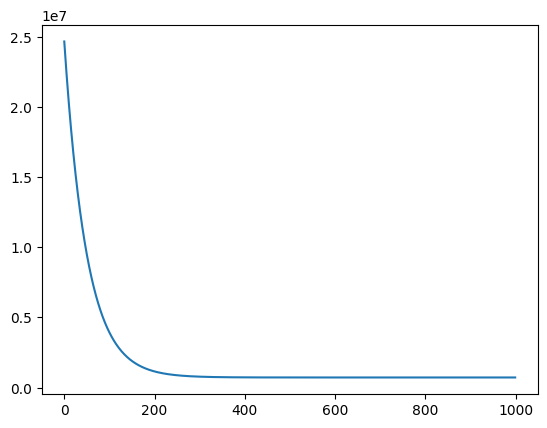

In [35]:
plt.plot(err_list)

In [36]:
print(final_theta)

[ 0.68383944 79.90228731]


In [37]:
X_test = pd.read_csv("Testing Data-001/Testing Data/Linear_X_Test.csv")
X_test = X_test.values
X_test = X_test.reshape((-1,))
print(X_test.shape)
x_test = X_test

(1250,)


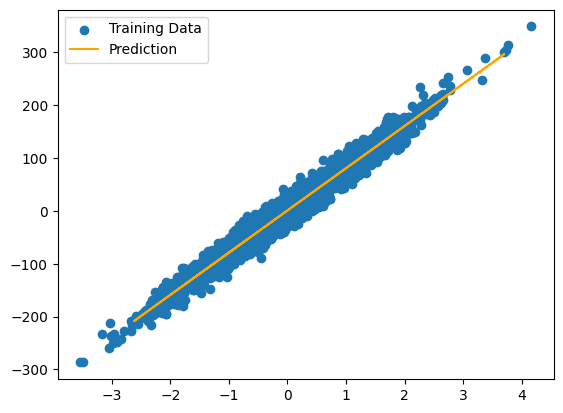

In [38]:
plt.scatter(x_train,y_train,label='Training Data')
plt.plot(x_test,hypothesis(x_test,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()